In [98]:
import numpy as np
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


PREPARED_DATASET_PATH = 'Desktop\Kurs_project_task/test.csv'
SCALER_FILE_PATH = 'Kornienko_Irina_model.pkl'
MODEL_FILE_PATH = 'Kornienko_Irina_scaler.pkl'


def evaluate_preds(true_val, pred_val):
    print('R2:\t' + str(round(r2(true_val, pred_val), 3)) + '\n' +
         'MAE:\t' + str(round(mae(true_val, pred_val), 3)) + '\n' + 
         'MSE:\t' + str(round(mse(true_val, pred_val), 3)))
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=pred_val, y = true_val)
    
    plt.xlabel('Predict values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()

In [2]:
test_df = pd.read_csv(PREPARED_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [3]:
train_df = pd.read_csv('Desktop\Kurs_project_task/train.csv')

In [5]:
train_df


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,7.122317e-03,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [6]:
train_df['Price'].value_counts().head()


207103.209097    1
179485.931037    1
456417.428803    1
149480.126085    1
245157.999097    1
Name: Price, dtype: int64

In [7]:
plt.figure(figsize = (16, 8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

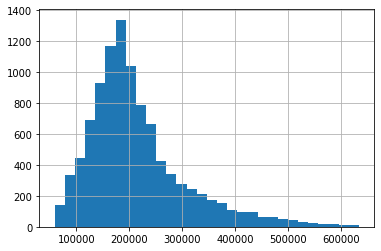

In [8]:
train_df['Price'].hist(bins=30)

In [10]:
train_df.columns.tolist()


['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [11]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [12]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [56]:
feture_ = ['Rooms',
 'Square',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1']
target_ = 'Price'

In [57]:
### Стандартизация признаков

In [58]:
train_df = train_df[feture_+[target_]]

In [59]:
train_df.head()

,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
0,0.130439,-0.395780,-0.009569,7,-0.532703,1969,-0.250529,33,7976,5,0,11,184966.930730
1,1.321667,0.444867,0.060460,7,-0.532703,1978,-0.998053,46,10309,1,1,16,300009.450063
2,0.130439,-0.539842,-0.219657,8,-0.089940,1968,-0.581588,34,7759,0,1,3,220925.908524
3,0.130439,-0.140699,0.095474,8,0.647998,1977,2.680470,23,5735,3,0,5,175616.227217
4,-1.060788,-0.791473,0.025445,11,-0.089940,1976,-0.894969,35,5776,1,2,4,150226.531644


In [60]:
feature_stand = train_df[feture_].select_dtypes(include = 'float64').columns.tolist()
feature_stand_n = train_df[feture_].select_dtypes(include = 'int64').columns.tolist()
### Как отстандировать дополнительно интеджеры

In [61]:
feature_stand
feature_stand_n

['Floor',
 'HouseYear',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1']

In [62]:
#### Скелер не работет на значениях NaN, пришлось удалить признаки из fetures LifeSquare и Helthcare1
scl =StandardScaler()
scl_f = scl.fit_transform(train_df[feature_stand])


In [63]:
#### Как добавить отстандартизированные признаки которые имеют тип интегер?
train_df[feature_stand] = pd.DataFrame(scl_f, columns=feature_stand)

In [64]:
train_df.head()

,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
0,0.130439,-0.395780,-0.009569,7,-0.532703,1969,-0.250529,33,7976,5,0,11,184966.930730
1,1.321667,0.444867,0.060460,7,-0.532703,1978,-0.998053,46,10309,1,1,16,300009.450063
2,0.130439,-0.539842,-0.219657,8,-0.089940,1968,-0.581588,34,7759,0,1,3,220925.908524
3,0.130439,-0.140699,0.095474,8,0.647998,1977,2.680470,23,5735,3,0,5,175616.227217
4,-1.060788,-0.791473,0.025445,11,-0.089940,1976,-0.894969,35,5776,1,2,4,150226.531644


Разбиение на train  и test

In [65]:
X = train_df[feture_]
# X = train_df[feature_stand]

y = train_df[target_]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 42)
X_train.head()

,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
9254,-1.060788,0.425282,-0.184643,3,-1.713404,1977,2.680470,23,5735,3,0,5
1561,0.130439,-0.533021,-0.184643,5,0.795586,2017,0.985142,16,3893,27,3,10
1670,-1.060788,-1.037753,-0.044584,3,-1.123053,1960,0.268528,16,3433,4,4,5
6087,1.321667,0.266664,-0.044584,4,-1.123053,1966,1.228634,37,5288,0,3,2
6669,-1.060788,-0.647979,-0.184643,8,0.647998,1977,-0.938799,1,264,0,0,1


Построение базовых моделей и выбор лучшей


Linear regression

In [66]:
l_model = LinearRegression()
l_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_pred_l = l_model.predict(X_train)

R2:	0.459
MAE:	46980.367
MSE:	4643118980.845


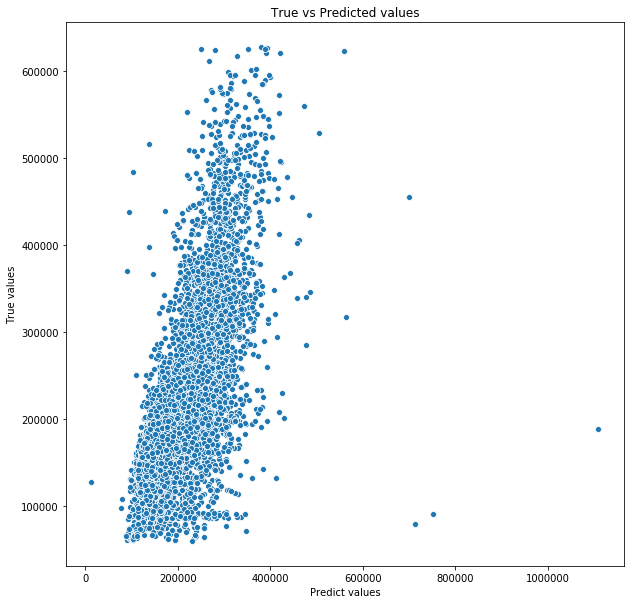

In [72]:
evaluate_preds(y_train, y_pred_l)

R2:	0.406
MAE:	47749.05
MSE:	5215243013.263


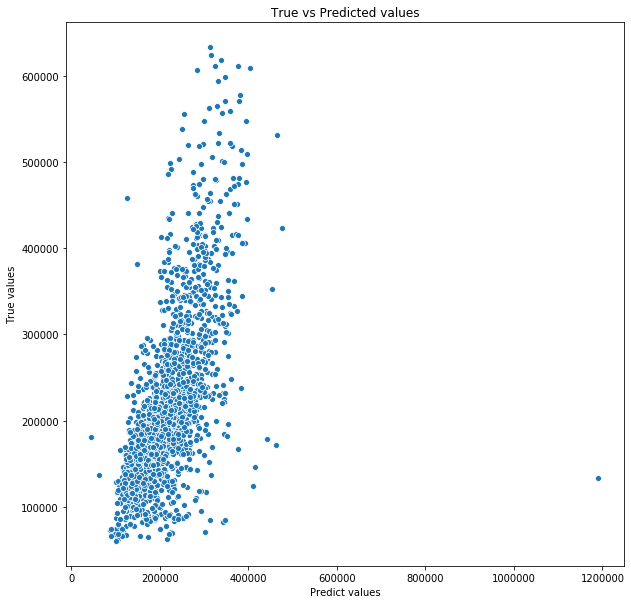

In [74]:
y_pred_lt = l_model.predict(X_test)
evaluate_preds(y_test, y_pred_lt)

Random forest

In [77]:
l_model = RandomForestRegressor()
l_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

R2:	0.945
MAE:	12231.282
MSE:	468258544.359


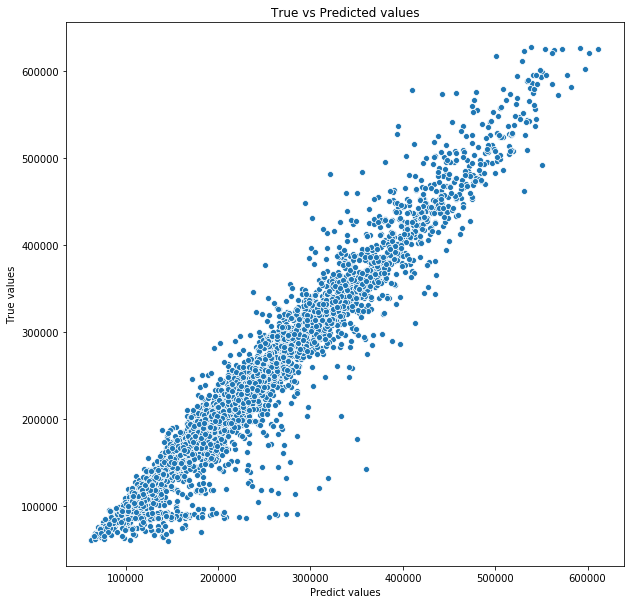

R2:	0.685
MAE:	30655.812
MSE:	2766943948.721


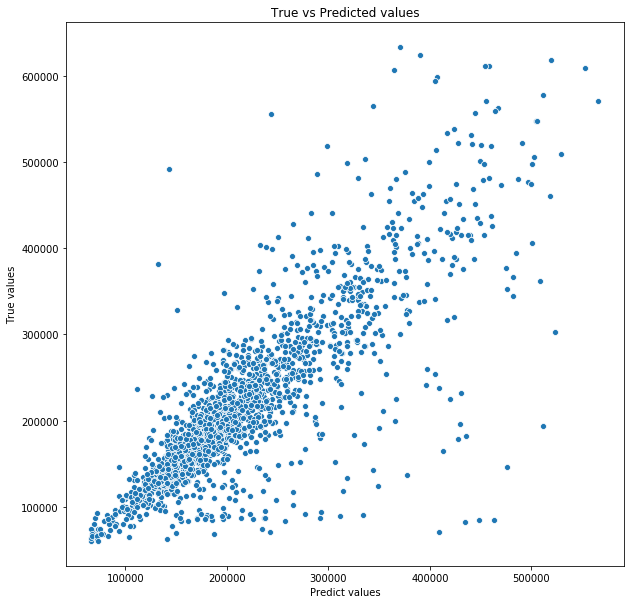

In [78]:
y_pred_l = l_model.predict(X_train)
evaluate_preds(y_train, y_pred_l)

y_pred_lt = l_model.predict(X_test)
evaluate_preds(y_test, y_pred_lt)

Gradient Boosting

In [80]:
l_model = GradientBoostingRegressor()
l_model.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.763
MAE:	29206.896
MSE:	2032601550.949


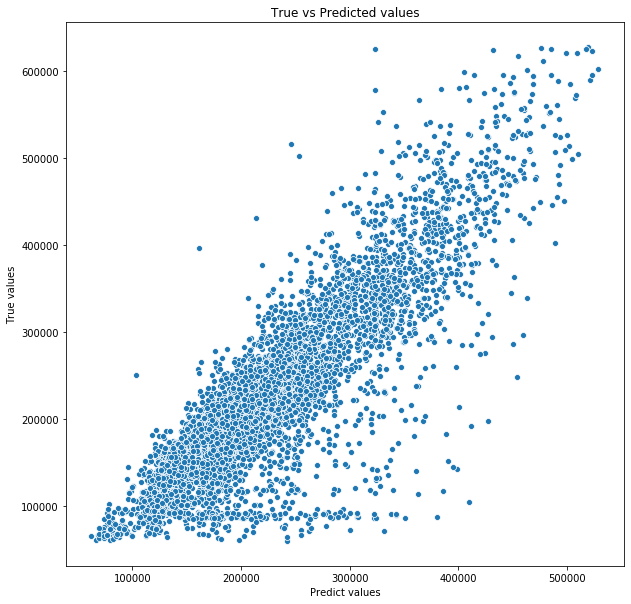

R2:	0.711
MAE:	31076.313
MSE:	2537483017.635


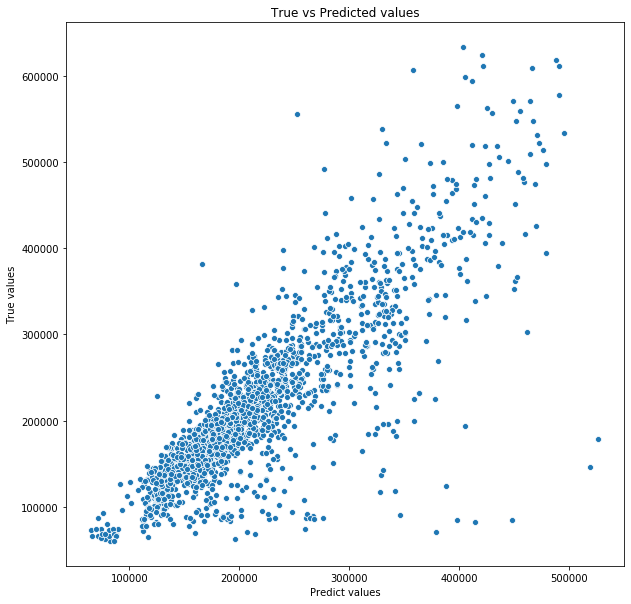

In [81]:
y_pred_l = l_model.predict(X_train)
evaluate_preds(y_train, y_pred_l)

y_pred_lt = l_model.predict(X_test)
evaluate_preds(y_test, y_pred_lt)

Настройка и оценка финальной модели

In [84]:
model = GradientBoostingRegressor(random_state=42)
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
param = {'n_estimators':[10,50,100,150,300], 'max_depth':[3,5,7,10]}

In [86]:
gd = GridSearchCV(model, param, scoring = 'r2', cv = KFold(n_splits=3, random_state=21))
gd.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                           

In [90]:
gd.best_params_



{'max_depth': 5, 'n_estimators': 150}

In [91]:
gd.best_score_

0.7405018244040653

In [94]:
model_best= GradientBoostingRegressor(random_state=42, n_estimators = 150, max_depth=5)
model_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

R2:	0.872
MAE:	21563.994
MSE:	1101253240.969


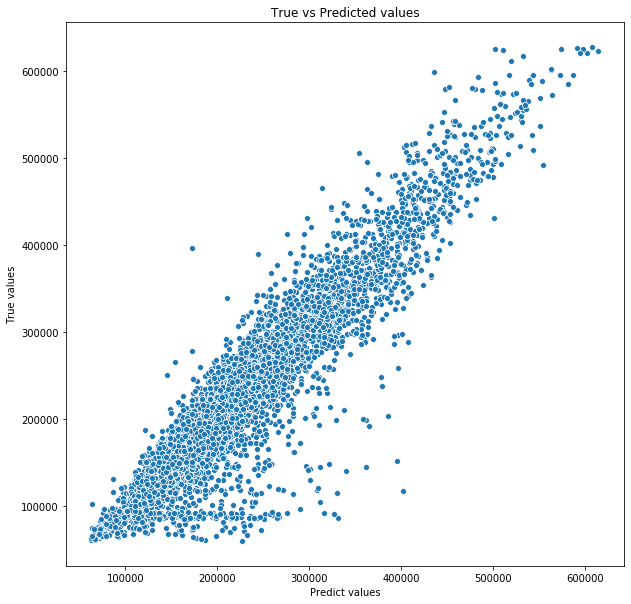

R2:	0.739
MAE:	27900.162
MSE:	2293652004.858


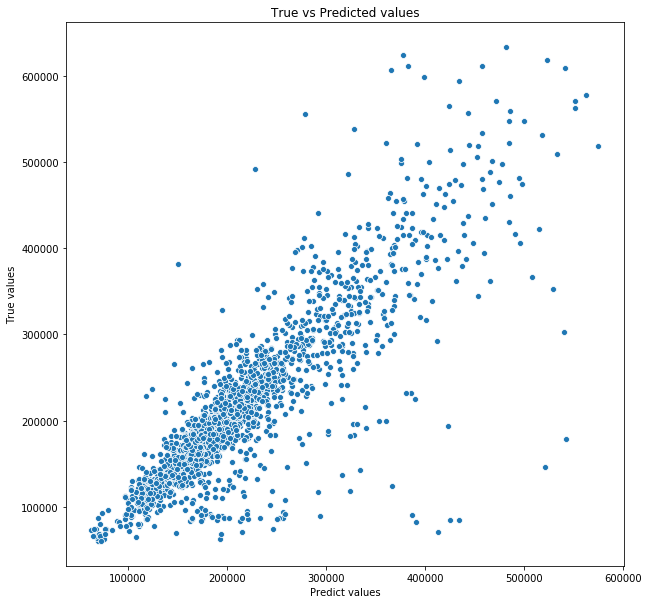

In [95]:
y_pred_l = model_best.predict(X_train)
evaluate_preds(y_train, y_pred_l)

y_pred_lt = model_best.predict(X_test)
evaluate_preds(y_test, y_pred_lt)

Важность признаков

In [96]:
model_best.feature_importances_

array([0.07103654, 0.43768439, 0.02549662, 0.01921082, 0.01939675,
       0.04016151, 0.05852121, 0.09425913, 0.11901277, 0.08627139,
       0.00559632, 0.02335256])

Сохранение модели

In [99]:
#### Scaler
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scl, file)

In [101]:
#### Model
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(model_best, file)